## Neural network development and application to predict if users will click on an ad based on profile attributes

#### Import libraries and load data

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# Load Data
data = pd.read_csv("processed_data.txt", sep="|")
data.head()

,User ID,Age,EstimatedSalary,Gender,Age_Scaled,Salary_Transformed_Scaled,Purchased
0,15624510,19,19000,1,-1.781797,-1.809254,0
1,15810944,35,20000,1,-0.253587,-1.752550,0
2,15668575,26,43000,0,-1.113206,-0.725701,0
3,15603246,27,57000,0,-1.017692,-0.246493,0
4,15804002,19,76000,1,-1.781797,0.311281,0


#### Define model features and inputs

In [3]:
# Define features
X = data[["Gender", "Age_Scaled", "Salary_Transformed_Scaled"]]

In [4]:
# Define target
y = data["Purchased"]

#### Divide data into testing and training sets

In [5]:
# Divide data into training and testing.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=25)

In [6]:
# Convert train and test data sets into tensors
import tensorflow as tf
tf.random.set_seed(15)

#### Define model and parameters

In [7]:
# Define model and layers
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(3,)), 
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

In [8]:
# Define model attributes
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=["accuracy"]
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 161 (644.00 B)

 Trainable params: 161 (644.00 B)

 Non-trainable params: 0 (0.00 B)

#### Train model

In [9]:
# Train model
num_epochs = 15
history = model.fit(X_train, y_train, batch_size=5, epochs=num_epochs, verbose=1, validation_data=(X_test, y_test))
history

Epoch 1/15
68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.6821 - loss: 0.6221 - val_accuracy: 0.7833 - val_loss: 0.5435
Epoch 2/15
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8425 - loss: 0.5139 - val_accuracy: 0.7667 - val_loss: 0.4682
Epoch 3/15
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8578 - loss: 0.4442 - val_accuracy: 0.7833 - val_loss: 0.4185
Epoch 4/15
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8655 - loss: 0.3982 - val_accuracy: 0.8000 - val_loss: 0.3871
Epoch 5/15
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8709 - loss: 0.3689 - val_accuracy: 0.8000 - val_loss: 0.3665
Epoch 6/15
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8724 - loss: 0.3491 - val_accuracy: 0.8000 - val_loss: 0.3521
Epoch 7/15
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8724 - loss: 0.3345 - val_accuracy: 0.8000 - val_loss: 0.3405
Epoch 8/15
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8724 - loss: 0.3232 - val_accuracy: 0.8167 - val_loss

#### Evaluate model

In [19]:
# Model Accuracy
results = model.evaluate(X_test, y_test, batch_size=5)
print("Model testing accuracy is", round(results[1], 3), "\nModel testing loss is", round(results[0], 3))

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9135 - loss: 0.2432 
Model testing accuracy is 0.867 
Model testing loss is 0.279


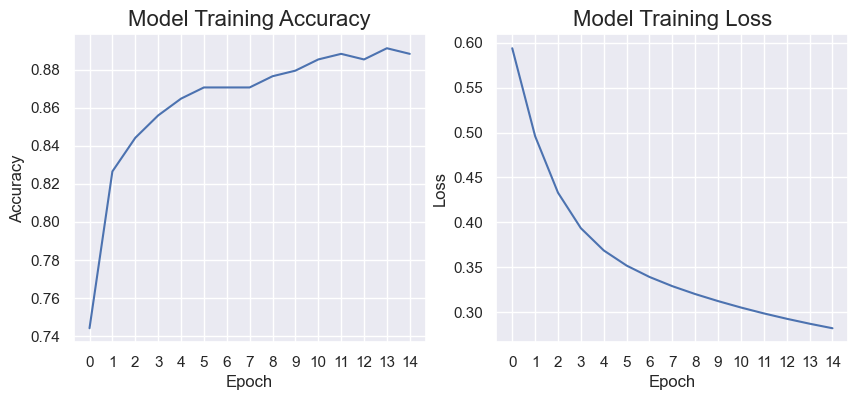

In [20]:
# Plot accuracy and loss
fix, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
ax1.plot(history.history["accuracy"])
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Accuracy")
ax1.set_xticks(np.arange(0, num_epochs, 1))
ax1.set_title("Model Training Accuracy", fontsize=16)

ax2.plot(history.history["loss"])
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Loss")
ax2.set_xticks(np.arange(0, num_epochs, 1))
ax2.set_title("Model Training Loss", fontsize=16)
plt.show()

In [12]:
# Predictions from testing data
y_pred = model.predict(X_test)

# Set theshold
threshold = 0.7
y_pred_with_threshold = np.where(y_pred > threshold, 1, 0)

# Generate confusion matrix
confusion_matrix = tf.math.confusion_matrix(y_test, y_pred_with_threshold)
confusion_matrix

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[36,  2],
       [ 8, 14]])>

In [22]:
# Take Values from Confusion Matrix
tp = confusion_matrix[0,0].numpy()
fp = confusion_matrix[0,1].numpy()
fn = confusion_matrix[1,0].numpy()
tn = confusion_matrix[1,1].numpy()

In [26]:
# Precision
precision = round(tp / (tp + fp), 2)
print("Model precision =", precision)

# Recall
recall = round(tp / (tp + fn), 2)
print("Model recall =", recall)

# F1 Score
f1_score = round(2 *(precision * recall) / (precision + recall), 2)
print("Model F1 Score =", f1_score)

Model precision = 0.95
Model recall = 0.82
Model F1 Score = 0.88


#### Model coefficients

In [27]:
# Use statsmodels to get p-values
import statsmodels.api as sm
ols_model = sm.OLS(y_train, X_train)
results = ols_model.fit()

In [28]:
# Coefficients and p-values
details = pd.DataFrame()
details["Coefficients"] = results.params
details["p-values"] = results.pvalues#.round(10)
details

,Coefficients,p-values
Gender,0.375529,1.254870e-25
Age_Scaled,0.284891,9.100785e-28
Salary_Transformed_Scaled,0.122238,4.209761e-07


#### Generate predictions based on new data

In [29]:
# Import scaler object from "Preprocessing" notebook
%store -r scaler

In [30]:
# Function to make predictions from a set of input tensors
def predict_with_new_data(input):
    scaled_input = scaler.fit_transform(input)
    scaled_input_tensor = tf.convert_to_tensor(scaled_input, dtype=tf.float32)
    prediction = model.predict(tf.stack(scaled_input_tensor))
    return tf.round(prediction * 1000.0) / 1000.0

In [31]:
# Generate new, random data to test model
random_new_data = []

for i in np.arange(1,21):
    gender_random = np.random.choice([0, 1]) # Gender
    age_random = int(np.random.uniform(18, 65)) # Age
    salary_transformed_random = int(np.random.uniform(180, 400)) # Salary
    test_user_data = [gender_random, age_random, salary_transformed_random]
    random_new_data.append(test_user_data)

random_new_data

[[0, 37, 302],
 [0, 40, 378],
 [0, 41, 297],
 [0, 25, 291],
 [1, 30, 236],
 [1, 37, 382],
 [1, 19, 390],
 [1, 18, 376],
 [1, 33, 314],
 [0, 20, 329],
 [1, 55, 386],
 [1, 57, 313],
 [1, 23, 232],
 [1, 63, 365],
 [0, 50, 398],
 [0, 60, 375],
 [1, 38, 191],
 [0, 48, 285],
 [0, 18, 328],
 [0, 33, 203]]

In [32]:
# Run prediction on randomized new data
new_predictions = predict_with_new_data(random_new_data)
new_predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


<tf.Tensor: shape=(20, 1), dtype=float32, numpy=
array([[0.11 ],
       [0.523],
       [0.179],
       [0.012],
       [0.014],
       [0.632],
       [0.068],
       [0.035],
       [0.06 ],
       [0.012],
       [0.901],
       [0.859],
       [0.003],
       [0.932],
       [0.775],
       [0.814],
       [0.068],
       [0.415],
       [0.008],
       [0.025]], dtype=float32)>